In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.image as mpimg
import matplotlib
import os
import json
from matplotlib.lines import Line2D

In [2]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Charter"
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage[bitstream-charter]{mathdesign} \usepackage{amsmath}'
LEFT, BOTTOM, RIGHT, TOP = 0.16, 0.16, 0.95, 0.95
X_LABEL_POS, Y_LABEL_POS = -0.1, -0.15

In [3]:
FONTSIZE = 15  # pt
PAGEWIDTH = 11  # inches
MATPLOTLIB_PARAMS = {
    # Font sizes
    "font.size": FONTSIZE,  # controls default text sizes
    "axes.titlesize": FONTSIZE,  # fontsize of the axes title
    "axes.labelsize": FONTSIZE,  # fontsize of the x and y labels
    "xtick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "ytick.labelsize": FONTSIZE,  # fontsize of the tick labels
    "legend.fontsize": FONTSIZE,  # legend fontsize
    "figure.titlesize": FONTSIZE,  # fontsize of the figure title
    # Figure size and DPI
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.figsize": (PAGEWIDTH / 2, PAGEWIDTH / 2),
    # colors
    "lines.markeredgewidth": 0.8,
    "axes.edgecolor": "black",
    "axes.grid": False,
    "grid.color": "0.9",
    "axes.grid.which": "both",
    # x-axis ticks and grid
    "xtick.bottom": True,
    "xtick.direction": "out",
    "xtick.color": "black",
    "xtick.major.bottom": True,
    "xtick.major.size": 4,
    "xtick.minor.bottom": True,
    "xtick.minor.size": 2,
    # y-axis ticks and grid
    "ytick.left": True,
    "ytick.direction": "out",
    "ytick.color": "black",
    "ytick.major.left": True,
    "ytick.major.size": 4,
    "ytick.minor.left": True,
    "ytick.minor.size": 2,
}
matplotlib.rcParams.update(MATPLOTLIB_PARAMS)

In [4]:
c_LGATr = "#419108"
c_Tr = "#E26D5C"
c_LLoCa = "#8C271E"
c_Slim = "#1E838C" # "#2A9D8F" # 
c_ParT = "#E9C46A"
c_LLoCaglobal = "#6C3A7A" # "#726C93"

m_LGATr = "*"
m_Tr = "o"
m_LLoCa = "D"
m_Slim = "X"
m_ParT = "s"
m_LLoCaglobal = "v"

# Figure 1 - Top tagging landscape

In [5]:
vals = {
    "BDT": {
        "eps03": 90,
        "year": 2017+1/12,
        "unc": 1,
        "class": 0,
    },
    "TopoDNN": {
        "eps03": 295,
        "year": 2017+2/12,
        "unc": 5,
        "class": 0,
    },
    "LoLa": {
        "eps03": 722,
        "year": 2017+7/12,
        "unc": 17,
        "class": 0,
    },
    "PFN": {
        "eps03": 888,
        "year": 2018+10/12,
        "unc": 17,
        "class": 0,
    },
    "TreeNiN": {
        "eps03": 1025,
        "year": 2019+12/12,
        "unc": 11,
        "class": 0,
    },
    "ParticleNet": {
        "eps03": 1615,
        "year": 2019+2/12,
        "unc": 93,
        "class": 0,
    },
    "ParT": {
        "eps03": 1602,
        "year": 2022+3/12,
        "unc": 81,
        "class": 0,
    },
    "MIParT": {
        "eps03": 2010,
        "year": 2024+7/12,
        "unc": 97,
        "class": 0,
    },
    "LorentzNet": {
        "eps03": 2195,
        "year": 2022+1/12,
        "unc": 173,
        "class": 1,
    },
    "PELICAN": {
        "eps03": 2250,
        "year": 2022+11/12,
        "unc": 75,
        "class": 1,
    },
    "L-GATr": {
        "eps03": 2240,
        "year": 2024+5/12,
        "unc": 70,
        "class": 1,
    },
    "L-GATr-slim": {
        "eps03": 2264,
        "year": 2025+12/12,
        "unc": 93,
        "class": 1,
    },
    "Transformer": {
        "eps03": 1613,
        "year": 2025+8/12,
        "unc": 118,
        "class": 0,
    },
    "LLoCa-Tr.": {
        "eps03": 2150,
        "year": 2025+8/12,
        "unc": 130,
        "class": 1,
    },
    "IAFormer": {
        "eps03": 2012,
        "year": 2025+5/12,
        "unc": 30,
        "class": 0,
    },
    "PET-v2-s": {
        "eps03": 2167,
        "year": 2025+10/12,
        "unc": 153,
        "class": 0,
    },
    "ParticleNet-f.t.": {
        "eps03": 1771,
        "year": 2022+3/12,
        "unc": 80,
        "class": 2,
    },
    "ParT-f.t.": {
        "eps03": 2766,
        "year": 2022+3/12,
        "unc": 130,
        "class": 2,
    },
    "MIParT-f.t.": {
        "eps03": 2789,
        "year": 2024+7/12,
        "unc": 133,
        "class": 2,
    },
    "L-GATr-f.t.": {
        "eps03": 2894,
        "year": 2024+10/12,
        "unc": 84,
        "class": 3,
    },
    "L-GATr-slim-f.t.": {
        "eps03": 2927,
        "year": 2025+12/12,
        "unc": 70,
        "class": 3,
    },
    "OmniLearned-M": {
        "eps03": 3208,
        "year": 2025+10/12,
        "unc": 176,
        "class": 2,
    },
    "OmniLearned-L": {
        "eps03": 3486,
        "year": 2025+10/12,
        "unc": 157,
        "class": 2,
    },
}

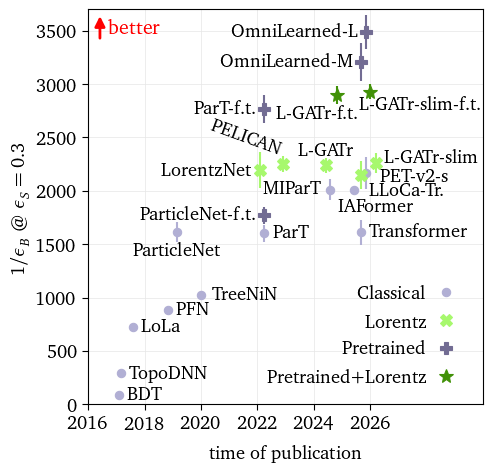

In [6]:
colors = ["#B1AFD4", "#a7f86d", "#726C93", "#419108"]
markers = ["o", "X", "P", "*"]
markersize = [6, 8, 8, 10]
labels = ["Classical", "Lorentz", "Pretrained", "Pretrained+Lorentz"]
FONTSIZE = 14

kwargs = dict(horizontalalignment="left", verticalalignment="center", fontsize=FONTSIZE)

FIGSIZE=(5,5)
fig,ax=plt.subplots(figsize=FIGSIZE)

ax.annotate(
    "",
    xy=(0.03, 0.99),
    xycoords='axes fraction',
    xytext=(0.03, 0.92),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', color='red', lw=2),
    color='red',
    ha='left', va='center',
    zorder=10, clip_on=False
)
ax.text(0.05, 0.94, "better",
        transform=ax.transAxes,
        color="red",
)

get_vals = lambda label: [vals[label][k] for k in ["year", "eps03", "unc", "class"]]
dx = 0.3

label = "BDT"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "TopoDNN"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "LoLa"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "TreeNiN"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+0.4, x1, label, **kwargs)

label = "PFN"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "ParticleNet"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["verticalalignment"] = "top"
kwargs_local["horizontalalignment"] = "center"
ax.text(x0, x1-100, label, **kwargs_local)

label = "ParT"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "Transformer"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1, label, **kwargs)

label = "ParticleNet-f.t."
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "OmniLearned-M"
x0, x1, unc, idx = get_vals(label)
x0 -= 0.15
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "OmniLearned-L"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "ParT-f.t."
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "LorentzNet"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "MIParT"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["horizontalalignment"] = "right"
ax.text(x0-dx, x1, label, **kwargs_local)

label = "IAFormer"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["verticalalignment"] = "top"
kwargs_local["horizontalalignment"] = "center"
ax.text(x0+0.8, x1-70, label, **kwargs_local)

label = "PET-v2-s"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+0.5, x1-30, label, **kwargs)

label = "LLoCa-Tr."
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+0.3, x1-155, label, **kwargs)

label = "L-GATr"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["verticalalignment"] = "bottom"
kwargs_local["horizontalalignment"] = "center"
ax.text(x0, x1+50, label, **kwargs_local)

label = "PELICAN"
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local = kwargs.copy()
kwargs_local["verticalalignment"] = "bottom"
kwargs_local["horizontalalignment"] = "right"
ax.text(x0, x1+50, label, **kwargs_local, rotation=-20)

label = "L-GATr-slim"
x0, x1, unc, idx = get_vals(label)
x0 += 0.2
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0+dx, x1+50, label, **kwargs)

label = "L-GATr-f.t."
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
kwargs_local["verticalalignment"] = "top"
kwargs_local["horizontalalignment"] = "center"
ax.text(x0-0.7, x1-80, label, **kwargs_local)

label = "L-GATr-slim-f.t."
x0, x1, unc, idx = get_vals(label)
ax.plot(x0, x1, marker=markers[idx], color=colors[idx], markersize=markersize[idx])
ax.errorbar(x0, x1, yerr=unc, color=colors[idx])
ax.text(x0-0.4, x1-120, label, **kwargs)

ax.set_xlabel(r"time of publication", fontsize=FONTSIZE)
ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlim(2016, 2030)
ax.grid(lw=0.5)
ax.set_ylim(0, 3700)
custom_entries = [
    matplotlib.lines.Line2D([0], [0], color=colors[i], linestyle="None",
                            marker=markers[i], markersize=markersize[i], label=labels[i])
    for i in range(4)
]
ax.legend(handles=custom_entries, loc=4, frameon=False, fontsize=FONTSIZE,
         markerfirst=False, handletextpad=0)

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_xticks([2016,2018,2020,2022,2024,2026])
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig("top_landscape.pdf", format="pdf")
plt.show()

# Figure 1 - JetClass landscape

In [7]:
vals = {
    "PELICAN-lite": {
        "time": 97,
        "auc": 0.9862,
        "params": 244,
        "mem": 27.4,
        "flops": 1370,
    },
    "LorentzNet": {
        "time": 64,
        "auc": .9856,
        "params": 223,
        "mem": 20.5,
        "flops": 676,
    },
    "L-GATr": {
        "auc": .9885,
        "time": 166,
        "flops": 2060,
        "mem": 19,
        "params": 1079,
    },
    "ParticleNet": {
        "auc": .9849,
        "time": 25,
        "flops": 413,
        "mem": 16.5,
        "params": 366,
    },
    "ParT": {
        "auc": .9877,
        "time": 33,
        "flops":211,
        "mem": 13.3,
        "params":2141,
    },
    "MIParT-L": {
        "auc": .9878,
        "time": 43,
        "flops":225,
        "mem": 53.6,
        "params":2380,
    },
    "LLoCa-ParticleNet": {
        "auc": .9857,
        "time": 43,
        "flops":517,
        "mem": 23.5,
        "params":385,
    },
    "LLoCa-ParT": {
        "auc": .9882,
        "time": 66,
        "flops":315,
        "mem": 19.9,
        "params":2160,
    },
    "Transformer": {
        "auc": .9867,
        "time": 15,
        "flops":210,
        "mem": 2.3,
        "params": 1979,
    },
    "LLoCa-Transformer": {
        "auc": .9882,
        "time": 29,
        "flops": 219,
        "mem": 4.1,
        "params": 1980,
    },
    "L-GATr-slim": {
        "auc": 0.9885,
        "time": 27,
        "flops": 329,
        "mem": 8.1,
        "params": 2031,
    },
}
for key in vals.keys():
    vals[key]["flops"] *= 1e6
    vals[key]["params"] *= 1e3

In [8]:
# overwrite parameters
colors = ["#B1AFD4", "#a7f86d", "#E26D5C"]
markers = ["o", "*", "s", "D"]
ms = [5, 8]
labels = ["Classical", "Lorentz"]
kwargs = dict(horizontalalignment="center", fontsize=FONTSIZE)
FIGSIZE=(5,5)
FONTSIZE = 15

In [9]:
file = PdfPages("jetclass_landscape.pdf")

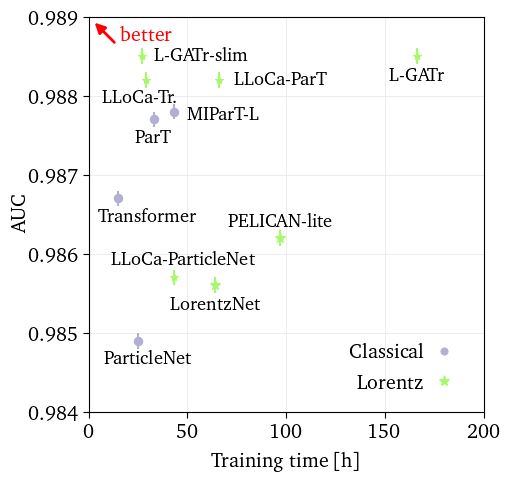

In [10]:
fig,ax=plt.subplots(figsize=FIGSIZE)

get_vals = lambda label: [vals[label][k] for k in ["time", "auc"]]

label = "PELICAN-lite"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]+.00015, label, **kwargs)

label = "LorentzNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "L-GATr"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "ParticleNet"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+5, x[1]-.0003, label, **kwargs)

label = "ParT"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "MIParT-L"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+25, x[1]-0.00005, label, verticalalignment="center", **kwargs)

label = "Transformer"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+15, x[1]-.0003, label, **kwargs)

label = "LLoCa-ParT"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+31, x[1], label, verticalalignment="center", **kwargs)

label = "LLoCa-ParticleNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+5, x[1]+.00015, label, **kwargs)

label = "LLoCa-Transformer"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]-3, x[1]-.0003, "LLoCa-Tr.", **kwargs)

label = "L-GATr-slim"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+30, x[1]-0.00005, label, **kwargs)

ax.annotate(
    "",
    xy=(0.01, 0.99),
    xycoords='axes fraction',
    xytext=(0.07, 0.93),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', color='red', lw=2),
    color='red',
    ha='left', va='center',
    zorder=10, clip_on=False
)
ax.text(0.08, 0.94, "better",
        transform=ax.transAxes,
        color="red",
)


ax.set_xlabel(r"Training time [h]", fontsize=FONTSIZE)
ax.set_ylabel(r"AUC", fontsize=FONTSIZE)
ax.set_xlim(0, 200)
ax.set_ylim(.984, .989)
ax.grid(True, lw=.5)
custom_entries = [
    matplotlib.lines.Line2D([0], [0], color=colors[i], linestyle="None",
                            marker=markers[i], markersize=ms[i], label=labels[i])
    for i in range(2)
]
ax.legend(handles=custom_entries, loc=4, frameon=False, fontsize=FONTSIZE,
         markerfirst=False, handletextpad=0)

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

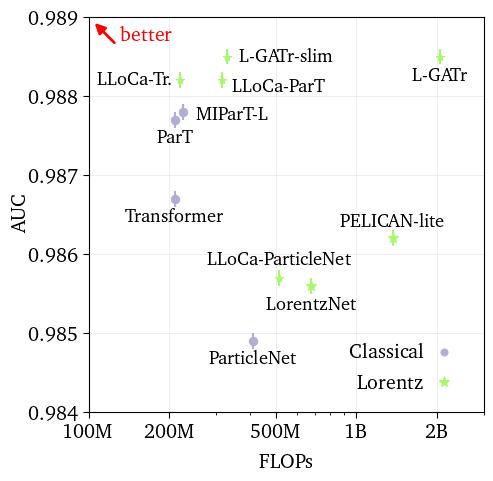

In [11]:
fig,ax=plt.subplots(figsize=FIGSIZE)

get_vals = lambda label: [vals[label][k] for k in ["flops", "auc"]]

label = "PELICAN-lite"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]+.00015, label, **kwargs)

label = "LorentzNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "L-GATr"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "ParticleNet"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "ParT"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "MIParT-L"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+1.2e8, x[1]-0.00005, label, verticalalignment="center", **kwargs)

label = "Transformer"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+15, x[1]-.0003, label, **kwargs)

label = "LLoCa-ParT"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+2e8, x[1]-0.00015, label, **kwargs)

label = "LLoCa-ParticleNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]+.00015, label, **kwargs)

label = "LLoCa-Transformer"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]-7e7, x[1], "LLoCa-Tr.", **kwargs, verticalalignment="center")

label = "L-GATr-slim"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+2.2e8, x[1], label, **kwargs, verticalalignment="center")

ax.annotate(
    "",
    xy=(0.01, 0.99),
    xycoords='axes fraction',
    xytext=(0.07, 0.93),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', color='red', lw=2),
    color='red',
    ha='left', va='center',
    zorder=10, clip_on=False
)
ax.text(0.08, 0.94, "better",
        transform=ax.transAxes,
        color="red",
)

ax.set_xlabel(r"FLOPs", fontsize=FONTSIZE)
ax.set_ylabel(r"AUC", fontsize=FONTSIZE)
ax.set_xscale("log")
ax.set_xlim(1e8, 3e9)
ax.set_ylim(.984, .989)
ax.grid(True, lw=.5)
custom_entries = [
    matplotlib.lines.Line2D([0], [0], color=colors[i], linestyle="None",
                            marker=markers[i], markersize=ms[i], label=labels[i])
    for i in range(2)
]
ax.legend(handles=custom_entries, loc=4, frameon=False, fontsize=FONTSIZE,
         markerfirst=False, handletextpad=0)

ax.set_xticks([1e8, 2e8, 5e8, 1e9, 2e9])
ax.set_xticklabels(["100M", "200M", "500M", "1B", "2B"])
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

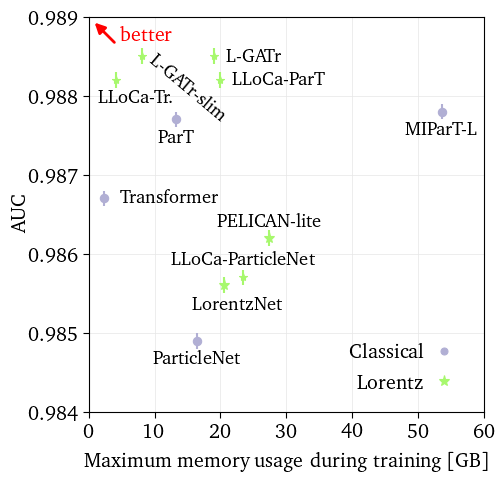

In [12]:
fig,ax=plt.subplots(figsize=FIGSIZE)

get_vals = lambda label: [vals[label][k] for k in ["mem", "auc"]]

label = "PELICAN-lite"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]+.00015, label, **kwargs)

label = "LorentzNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+2, x[1]-.0003, label, **kwargs)

label = "L-GATr"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+6, x[1], label, verticalalignment="center", **kwargs)

label = "ParticleNet"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "ParT"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-.0003, label, **kwargs)

label = "MIParT-L"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-0.0003, label, **kwargs)

label = "Transformer"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+10, x[1], label, verticalalignment="center", **kwargs)

label = "LLoCa-ParT"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+9, x[1], label, verticalalignment="center", **kwargs)

label = "LLoCa-ParticleNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]+.00015, label, **kwargs)

label = "LLoCa-Transformer"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+3, x[1]-0.0003, "LLoCa-Tr.", **kwargs)

label = "L-GATr-slim"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+7, x[1]-0.0004, label, **kwargs, verticalalignment="center", rotation=-40)

ax.annotate(
    "",
    xy=(0.01, 0.99),
    xycoords='axes fraction',
    xytext=(0.07, 0.93),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', color='red', lw=2),
    color='red',
    ha='left', va='center',
    zorder=10, clip_on=False
)
ax.text(0.08, 0.94, "better",
        transform=ax.transAxes,
        color="red",
)

ax.set_xlabel(r"Maximum memory usage during training [GB]", fontsize=FONTSIZE)
ax.set_ylabel(r"AUC", fontsize=FONTSIZE)
ax.set_xlim(0, 60)
ax.set_ylim(.984, .989)
ax.grid(True, lw=.5)
custom_entries = [
    matplotlib.lines.Line2D([0], [0], color=colors[i], linestyle="None",
                            marker=markers[i], markersize=ms[i], label=labels[i])
    for i in range(2)
]
ax.legend(handles=custom_entries, loc=4, frameon=False, fontsize=FONTSIZE,
         markerfirst=False, handletextpad=0)

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

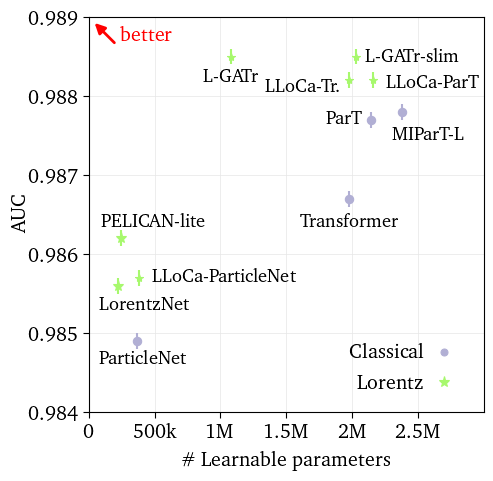

In [13]:
fig,ax=plt.subplots(figsize=FIGSIZE)

get_vals = lambda label: [vals[label][k] for k in ["params", "auc"]]

label = "PELICAN-lite"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+250e3, x[1]+.00015, label, **kwargs)

label = "LorentzNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx], markersize=ms[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+200e3, x[1]-.0003, label, **kwargs)

label = "L-GATr"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-0.00025, label, verticalalignment="center", **kwargs)

label = "ParticleNet"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+50e3, x[1]-.0003, label, **kwargs)

label = "ParT"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]-200e3, x[1], label, verticalalignment="center", **kwargs)

label = "MIParT-L"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+200e3, x[1]-0.0003, label, verticalalignment="center", **kwargs)

label = "Transformer"
x = get_vals(label)
idx = 0
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0], x[1]-0.0003, label, verticalalignment="center", **kwargs)

label = "LLoCa-ParticleNet"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+650e3, x[1], label, verticalalignment="center", **kwargs)

label = "LLoCa-ParT"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+4.5e5, x[1]-0.0001, label, **kwargs)

label = "LLoCa-Transformer"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]-3.5e5, x[1]-0.0001, "LLoCa-Tr.", verticalalignment="center", **kwargs)

label = "L-GATr-slim"
x = get_vals(label)
idx = 1
ax.plot(x[0], x[1], marker=markers[idx], color=colors[idx])
ax.errorbar(x[0], x[1], yerr=0.0001, color=colors[idx])
ax.text(x[0]+4.3e5, x[1], label, **kwargs, verticalalignment="center")

ax.annotate(
    "",
    xy=(0.01, 0.99),
    xycoords='axes fraction',
    xytext=(0.07, 0.93),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle='-|>', color='red', lw=2),
    color='red',
    ha='left', va='center',
    zorder=10, clip_on=False
)
ax.text(0.08, 0.94, "better",
        transform=ax.transAxes,
        color="red",
)

ax.set_xlabel(r"\# Learnable parameters", fontsize=FONTSIZE)
ax.set_ylabel(r"AUC", fontsize=FONTSIZE)
ax.set_xlim(0, 3000e3)
ax.set_ylim(.984, .989)
ax.grid(True, lw=.5)
custom_entries = [
    matplotlib.lines.Line2D([0], [0], color=colors[i], linestyle="None",
                            marker=markers[i], markersize=ms[i], label=labels[i])
    for i in range(2)
]
ax.legend(handles=custom_entries, loc=4, frameon=False, fontsize=FONTSIZE,
         markerfirst=False, handletextpad=0)

ax.set_xticks([0, 500e3, 1e6, 1.5e6, 2e6, 2.5e6])
ax.set_xticklabels(["0", "500k", "1M", "1.5M", "2M", "2.5M"])
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

In [14]:
file.close()

# Figure 2 - Event generation

In [15]:
FONTSIZE = 14

colors = [c_Tr, c_LLoCa, c_LGATr, c_Slim]
labels = ["Transformer", "LLoCa-Transformer", "L-GATr", "L-GATr-slim"]
markers = [m_Tr, m_LLoCa, m_LGATr, m_Slim]
linestyles = [":", "--", "-.", "-"]

In [16]:
file = PdfPages("generation_NLL.pdf")

In [17]:
metrics = {
    "Tr": 
    {
        100: [-32.46,-32.45,-32.44,-32.49],
        40: [-32.46,-32.44,-32.49,-32.45],
        10: [-32.41,-32.29,-32.42,-32.49],
        4: [-32.33,-32.31,-32.35,-32.37],
        1: [-31.65,-31.63,-31.59,-31.67],
        0.4: [-31.25,-31.12,-31.08],
        0.1: [-30.34,-30.40,-30.46,-30.51],
        0.04: [-28.80,-29.83,-28.79,-28.80],
    },
    "LLoCa-Tr": 
    {
        100: [-32.62,-32.62,-32.55,-32.61,-32.58,-32.59,-32.66,-32.64,-32.64],
        40: [-32.59,-32.59,-32.59,-32.62], 
        10: [-32.63,-32.56,-32.63,-32.60],
        4: [-32.60,-32.51,-32.51],
        1: [-31.99,-31.90,-31.59,-31.93],
        0.4: [-30.79,-31.87,-31.49,-31.49,-31.55,-31.65],
        0.1: [-30.29,-30.28,-29.56,-29.89,-29.73,-29.86],
        0.04: [-28.70,-29.77,-29.20,-28.53,-29.24,-29.19],
    },
    "LGATr": 
    {
        100: [-32.66,-32.67,-32.68],
        40: [-32.70,-32.68,-32.67],           
        10: [-32.64,-32.61,-32.66],
        4: [-32.59,-32.57,-32.56],
        1: [-32.00,-31.98,-32.00],
        0.4: [-31.52,-31.49,-31.48],
        0.1: [-30.79,-30.02,-30.88,-30.88,-30.28],
        0.04: [-30.03,-29.76,-30.19,-29.97,-29.88],
    },
    "Slim": {
        100: [-32.64,-32.62,-32.62,-32.60,-32.62,-32.63,-32.62],
        40: [-32.64,-32.58,-32.62,-32.62,-32.60,-32.59,-32.62],
        10: [-32.59,-32.58,-32.60,-32.64,-32.58,-32.56,-32.57],
        4: [-32.50,-32.49,-32.47,-32.53,-32.52,-32.53,-32.50],
        1: [-31.91,-31.94,-31.90,-31.94,-31.77,-31.89,-31.87],
        0.4: [-31.55,-31.52,-30.63,-31.55,-31.54,-31.49,-31.41],
        0.1: [-30.26,-30.92,-30.86,-30.82,-30.88,-30.76],
        0.04: [-30.08,-30.32,-29.94,-29.93,-30.23,-30.26],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

In [18]:
means = [np.array([y["mean"] for y in x.values()]) for x in metrics.values()]
stds = [np.array([y["std"] for y in x.values()]) for x in metrics.values()]
keys = np.array([list(x.keys()) for x in metrics.values()][0]) * 5e6 / 100

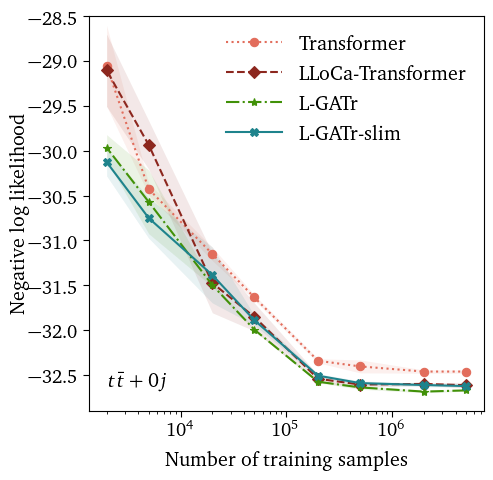

In [19]:
ymin = -32.9
ymax = -28.5

fig,ax=plt.subplots(figsize=(5,5))
ax.set_xscale("log")
for i, mean, std, color, label, linestyle, marker in zip(range(len(means)), means, stds, colors, labels, linestyles, markers):
    ax.plot(keys, mean, color=color, linestyle=linestyle, label=label, marker=marker)
    ax.fill_between(keys, mean-std, mean+std,
                edgecolor=color, color=color, lw=.01,
                alpha=0.1)

ax.set_ylabel("Negative log likelihood")
ax.set_xlabel("Number of training samples")
ax.legend(frameon=False, loc="upper right", handlelength=2.7)
ax.text(.05, .05, s=r"$t\bar t+0j$", horizontalalignment="left", verticalalignment="bottom",
                    transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

In [20]:
# 6 blocks
metrics = {
    "Tr":
    {
        6: [-32.46,-32.45,-32.44,-32.49],
        7: [-38.09,-38.05,-38.06,-38.03],
        8: [-43.45,-43.44,-43.47,-43.41,],
        9: [-48.63,-48.73,-48.57],#,-48.44
        10: [-53.96,-53.90,-53.85,-53.93,-53.93,-53.89],
    },
    "LLoCa-Tr": 
    {
        6: [-32.62,-32.62,-32.55,-32.61,-32.58,-32.59,-32.66,-32.64,-32.64],
        7: [-38.24,-38.28,-38.27,-38.27,-38.30],
        8: [-43.62,-43.65,-43.60,-43.66,-43.63,-43.61],
        9: [-48.88,-48.84,-48.81,-48.81,-48.87,-48.91],
        10: [-53.95,-54.03,-54.09,-54.09],
    },
    "LGATr":
    {
        6: [-32.66,-32.67,-32.68],
        7: [-38.24,-38.30,-38.33],
        8: [-43.71,-43.69,-43.60],
        9: [-48.90,-48.90,-48.94],
        10: [-54.18,-54.08,-54.16],
    },
    "Slim": 
    {
        6: [-32.64,-32.62,-32.62,-32.60,-32.62,-32.63,-32.62],
        7: [-38.33,-38.24,-38.34,-38.28,-38.25,-38.27],
        8: [-43.75,-43.70,-43.66,-43.65,-43.66],
        9: [-48.96,-48.93,-48.91,-48.85,-48.95,-48.88,-48.77],
        10: [-54.06,-54.10,-54.22,-54.00,-54.04,-54.08,-54.04],
    },
}
metrics = {key: {k: {"mean": np.mean(v)/k, "std": np.std(v)/k} for k, v in value.items()} 
           for key, value in metrics.items()}

In [21]:
means = [np.array([y["mean"] for y in x.values()]) for x in metrics.values()]
stds = [np.array([y["std"] for y in x.values()]) for x in metrics.values()]
x = list(range(5))
xticks = [r"$t\bar t+{%s}j$" % i for i in range(5)]

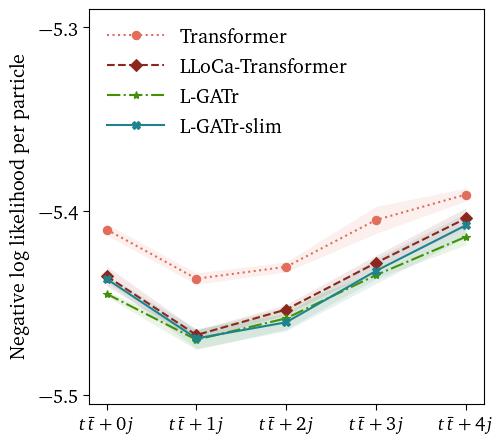

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
for i, mean, std, color, label, linestyle, marker in zip(range(len(means)), means, stds, colors, labels, linestyles, markers):
    ax.plot(x, mean, color=color, linestyle=linestyle, label=label, marker=marker)
    ax.fill_between(x, mean-std, mean+std,
                edgecolor=color, color=color, lw=.01,
                alpha=0.1)

ax.set_ylabel("Negative log likelihood per particle")
ax.set_xticks(x)
ax.set_xticklabels(xticks, fontsize=FONTSIZE)
ax.set_yticks([-5.5,-5.4,-5.3])
ax.set_ylim(-5.505,-5.29)
ax.legend(frameon=False, loc="upper left", handlelength=2.7)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

In [23]:
file.close()

# Figure 3 - Tagger scaling with parameters

In [24]:
file = PdfPages("param_scaling.pdf")

In [25]:
params = {
    "Transformer": {
        "1k": 1777,
        "10k": 17121,
        "100k": 133441,
        "1M": 1584769,
    },
    "ParT": {
        "10k": 31201,
        "100k": 221329,
        "1M": 2141005,
    },
    "LLoCa-Tr.": {
        "1k": 1876,
        "10k": 17348,
        "100k": 134020,
        "1M": 1586436,
    },
    "L-GATr-slim": {
        "1k": 2197,
        "10k": 22921,
        "100k": 179089,
        "1M": 2031201,
    }
}
params["LLoCa-Tr. global"] = params["LLoCa-Tr."]

metrics = {
    "Transformer": {
        "1k": [696,671,675,699,742],
        "10k": [897,886,922,910,922],
        "100k": [1374,1463,1262,1195,1320],
        "1M": [1530,1642,1442,1485,1697],
    },
    "ParT": {
        "10k": [1122,1231,1346,1122,1167],
        "100k": [1711,1669,1442,1518,1628],
        "1M": [1590,1590,1518,1819,1453],
    },
    "LLoCa-Tr.": {
        "1k": [1122,1063,1035,1041,1091],
        "10k": [1432,1474,1328,1553,1422],
        "100k": [2040,1941,1905,1803,1726],
        "1M": [2171,2148,2103,2195],
    },
    "LLoCa-Tr. global": {
        "1k": [863,930,886,801,780],
        "10k": [1181,1097,1294,1181,990],
        "100k": [1642,1507,1541,1642,1642],
        "1M": [1577,1518,1518,1463,1565],
    },
    "L-GATr-slim": { 
        "1k": [357,379,397,473],
        "10k": [845,845,817,897,748],
        "100k": [1541,1697,1771,1432],
        "1M": [2269,2433,2294,2269,2148,2171],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

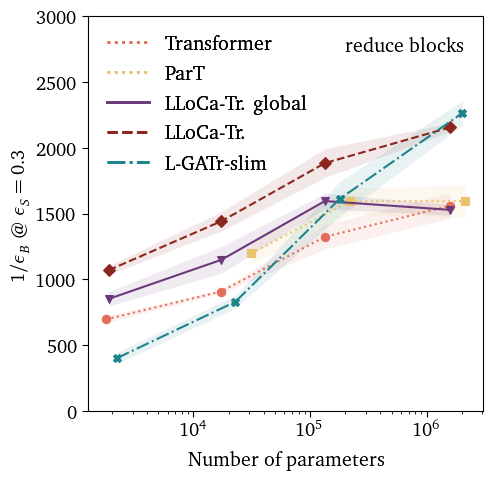

In [26]:
colors = [c_Tr, c_ParT, c_LLoCaglobal, c_LLoCa, c_Slim]
labels = ["Transformer", "ParT", "LLoCa-Tr. global", "LLoCa-Tr.", "L-GATr-slim"]
markers = [m_Tr, m_ParT, m_LLoCaglobal, m_LLoCa, m_Slim]
linestyles = [":", ":", "-", "--", "-."]
FIGSIZE = (5,5)

ymin = 0
ymax = 3000

fig,ax=plt.subplots(figsize=FIGSIZE)
ax.set_xscale("log")
for label, color, marker, linestyle in zip(labels, colors, markers, linestyles):
    if label in metrics.keys() and label in params.keys():
        keys = metrics[label]
        p = np.array([params[label][k] for k in keys])
        mean = np.array([metrics[label][k]["mean"] for k in keys])
        std = np.array([metrics[label][k]["std"] for k in keys])
            
        mask = np.array([x is not None for x in mean])
        p = p[mask]
        mean = mean[mask]
        std = std[mask]

        ax.plot(p, mean, color=color, linestyle=linestyle, marker=marker)
        ax.fill_between(p, mean+std, mean-std, 
                        edgecolor=color, color=color, alpha=0.1, lw=0.01)

ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlabel("Number of parameters")

handles1 = [Line2D([0,1], [0,0], color=c, lw=2, linestyle=ls) for c, ls in zip(colors, linestyles)]
labels1 = labels
leg1 = ax.legend(
    handles1, labels1, loc="upper left",
    frameon=False,
)
ax.add_artist(leg1)

ax.text(.95, .95, s="reduce blocks", horizontalalignment="right", verticalalignment="top",
                    transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

In [27]:
params = {
    "Transformer": {
        "1k": 1237,
        "10k": 16465,
        "100k": 126049,
        "1M": 1584769,
    },
    "ParT": {
        "1k": 3070,
        "10k": 10162,
        "100k": 140489,
        "1M": 1978753,
    },
    "LLoCa-Tr.": {
        "1k": 1336,
        "10k": 16692,
        "100k": 126628,
        "1M": 1586436,
    },
    "L-GATr-slim": {
        "1k": 2107,
        "10k": 24549,
        "100k": 217289,
        "1M": 2031201,
    }
}
params["LLoCa-Tr. global"] = params["LLoCa-Tr."]

metrics = {
    "Transformer": {
        "1k": [345,420,340,451,398,326],
        "10k": [1091,961,957,961,1134,930],
        "100k": [1577,1463,1577,1364,1577,1311],
        "1M": [1530,1642,1442,1485,1697],
    },
    "ParT": {
        "1k": [], # still running
        "10k": [1262,1188,1154,1254,1134],
        "100k": [1836,1602,1923,1726,1819],
        "1M": [1590,1590,1518,1819,1453],
    },
    "LLoCa-Tr.": {
        "1k": [759,1057,1097,1057,1109,1074],
        "10k": [1035,1286,1134,1303,1303,1337],
        "100k": [1905,1803,1615,1887,1756,1941],
        "1M": [2171,2148,2103,2195],
    },
    "LLoCa-Tr. global": {
        "1k": [691,534,605,505],
        "10k": [952,1134,1216,1231,1231],
        "100k": [1553,1530,1683,1453,1337],
        "1M": [1577,1518,1518,1463,1565],
    },
    "L-GATr-slim": { 
        "1k": [1602,1278,1402,1655],
        "10k": [1507,1355,1442,1432],
        "100k": [1980,1771,2040,1852,2148],
        "1M": [2269,2433,2294,2269,2148,2171],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

/home/jspinner/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jspinner/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/jspinner/.local/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jspinner/.local/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/jspinner/.local/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


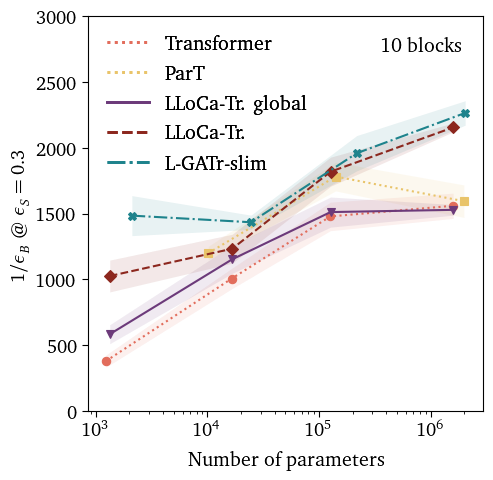

In [28]:
colors = [c_Tr, c_ParT, c_LLoCaglobal, c_LLoCa, c_Slim]
labels = ["Transformer", "ParT", "LLoCa-Tr. global", "LLoCa-Tr.", "L-GATr-slim"]
markers = [m_Tr, m_ParT, m_LLoCaglobal, m_LLoCa, m_Slim]
linestyles = [":", ":", "-", "--", "-."]
FIGSIZE = (5,5)

ymin = 0
ymax = 3000

fig,ax=plt.subplots(figsize=FIGSIZE)
ax.set_xscale("log")
for label, color, marker, linestyle in zip(labels, colors, markers, linestyles):
    if label in metrics.keys() and label in params.keys():
        keys = metrics[label]
        p = np.array([params[label][k] for k in keys])
        mean = np.array([metrics[label][k]["mean"] for k in keys])
        std = np.array([metrics[label][k]["std"] for k in keys])
            
        mask = np.array([x is not None for x in mean])
        p = p[mask]
        mean = mean[mask]
        std = std[mask]

        ax.plot(p, mean, color=color, linestyle=linestyle, marker=marker)
        ax.fill_between(p, mean+std, mean-std, 
                        edgecolor=color, color=color, alpha=0.1, lw=0.01)

ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlabel("Number of parameters")

handles1 = [Line2D([0,1], [0,0], color=c, lw=2, linestyle=ls) for c, ls in zip(colors, linestyles)]
labels1 = labels
leg1 = ax.legend(
    handles1, labels1, loc="upper left",
    frameon=False,
)
ax.add_artist(leg1)

ax.text(.95, .95, s="10 blocks", horizontalalignment="right", verticalalignment="top",
                    transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file, format="pdf")
plt.show()

In [29]:
file.close()

# Figure 7 - Energy consumption

In [30]:
with open("../cost_estimate/energy_50.json", "r") as file:
    energy = json.load(file)
model_map = {
    "transformer": "Transformer",
    "particletransformer": "ParT",
    "llocatransformer": "LLoCa-Tr.",
    "lgatr-slim": "L-GATr-slim",
}
model_map_inv = {v: k for k, v in model_map.items()}

In [31]:
# everything to be updated
metrics = {
    "Transformer": {
        "float32,float32": [1628,1628,1628,1541,1590,1530,1642,1442,1485,1697],
        "float16,float16": [1711,1711,1530,1711,1337],
        "float8,float8": [1577,1474,1590,1518,1530],
        "float8,ternary": [1057,1074,1154,1005,1160],
    },
    "ParT": {
        "float32,float32": [1432,1565],
        "float16,float16": [1262,1346],
        "float8,float8": [1432,1565],
        "float8,ternary": [1432,1553],
    },
    "LLoCa-Tr.": {
        "float32,float32": [2243,2433,2171,2148,2103,2195],
        "float16,float16": [2195,2195,2493],
        "float8,float8": [2348,1836,2103,1941,2462],
        "float8,ternary": [2082,2103,2060],
    },
    "L-GATr-slim": {
        "float32,float32": [2269,2433,2294,2269,2148,2171],
        "float16,float16": [2060,2433,2195,2195,2195],
        "float8,float8": [2269,2119,2195],
        "float8,ternary": [2148,2321],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

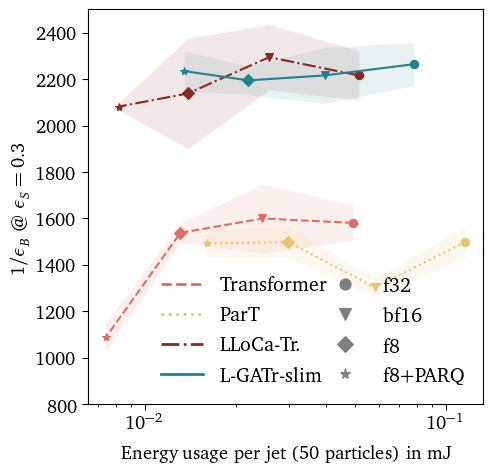

In [32]:
colors = [c_Tr, c_ParT, c_LLoCa, c_Slim]
labels = ["Transformer", "ParT", "LLoCa-Tr.", "L-GATr-slim"]
linestyles = ["--", ":", "-.", "-"]

keys = [
    "float32,float32", 
    "float16,float16", 
    "float8,float8",
    "float8,ternary",
]
key_labels = {
    "float32,float32": "f32",
    "float16,float16": "bf16",
    "float8,float8": "f8",
    "float8,ternary": "f8+PARQ",
}
markers = {
    "float32,float32": "o",
    "float16,float16": "v",
    "float8,float8": "D",
    "float8,ternary": "*",
}

ymin=800
ymax=2500
xmin=0

mode_dict = {
    "Horrowitz": 0,
    "H100 estimate": 2,
}
mode = "H100 estimate"
mode_idx = mode_dict[mode]
fig,ax=plt.subplots(figsize=(5,5))
ax.set_xscale("log")
for label, color, linestyle in zip(labels, colors, linestyles):
    data = metrics[label]
    data = {k: data[k] for k in keys}
    ener = np.array([energy[model_map_inv[label]][k][mode_idx] for k in keys])
    ener *= 1e-9
    mean = np.array([metrics[label][k]["mean"] for k in keys])
    std = np.array([metrics[label][k]["std"] for k in keys])
    ms = [markers[k] for k in keys]

    mask = np.array([x is not None for x in mean])
    ener = ener[mask]
    mean = mean[mask]
    std = std[mask]
    ms = [m for i, m in enumerate(ms) if mask[i]]

    for e, m, s, mar in zip(ener, mean, std, ms):
        if m is None or s is None:
            continue
        ax.plot(e, m, color=color, marker=mar, markersize=6)
    ax.plot(ener, mean, color=color, linestyle=linestyle)
    ax.fill_between(ener, mean+std, mean-std, 
                    edgecolor=color, color=color, alpha=0.1, lw=0.01)

ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlabel("Energy usage per jet (50 particles) in mJ", fontsize=FONTSIZE)

handles1 = [Line2D([0,1], [0,0], color=c, lw=2, linestyle=ls) for c, ls in zip(colors, linestyles)]
labels1 = labels
leg1 = ax.legend(
    handles1, labels1, loc="lower right", bbox_to_anchor=(0.65,0),
    frameon=False,
)
ms = [markers[k] for k in keys]
handles2 = [
    Line2D(
        [0],[0], linestyle="None", marker=m,
        markersize=8, markerfacecolor="0.5", 
        markeredgecolor="0.5",
    ) for m in ms
]
labels2 = [key_labels[k] for k in keys]
leg2 = ax.legend(
    handles2, labels2, loc="lower right", bbox_to_anchor=(1,0),
    frameon=False,
)
ax.add_artist(leg1)

#ax.text(.05, .95, s=mode, horizontalalignment="left", verticalalignment="top",
#                    transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig("energy.pdf", format="pdf")
plt.show()

# Figure 8 - Bitops consumption

In [33]:
file2 = PdfPages("bitops.pdf")

In [34]:
with open("../cost_estimate/bitops_50.json", "r") as file:
    bitops = json.load(file)
model_map = {
    "transformer": "Transformer",
    "llocatransformer": "LLoCa-Tr.",
    "llocatransformer-global": "LLoCa-Tr. global",
}
model_map_inv = {v: k for k, v in model_map.items()}

In [35]:
# all numbers are from 24.11. Jonas top2/v1 -> should be updated
metrics = {
    "Transformer": {
        "float32,float32": [742,777,713,704,789],
        "float16,float16": [716,732,691,684,694],
        "float8,float8": [704,687,706,680,623],
        #"float8,ternary": [],
    },
    "LLoCa-Tr.": {
        "float32,float32": [1074,1080,1068,1116,1216],
        "float16,float16": [1010,1080,1262,1080,1035],
        "float8,float8": [1015,1188,1063,1103,1035],
        #"float8,ternary": [],
    },
    "LLoCa-Tr. global": {
        "float32,float32": [719,828,930,882,1025],
        "float16,float16": [783,897,814,856,886],
        "float8,float8": [786,726,762,821],
        #"float8,ternary": [],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

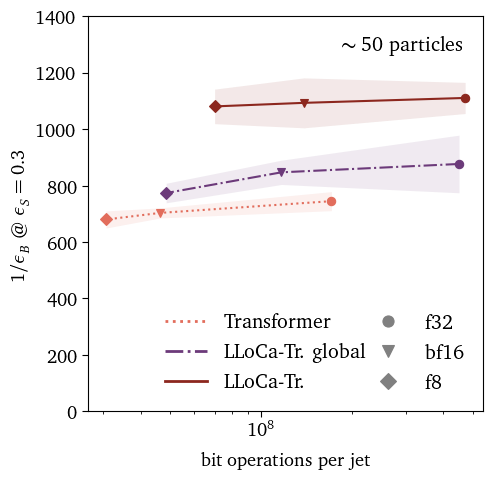

In [36]:
colors = [c_Tr, c_LLoCaglobal, c_LLoCa]
labels = ["Transformer", "LLoCa-Tr. global", "LLoCa-Tr."]
linestyles = [":", "-.", "-"]

keys = ["float32,float32", "float16,float16", "float8,float8"]
key_labels = {
    "float32,float32": "f32",
    "float16,float16": "bf16",
    "float8,float8": "f8",
    "float8,ternary": "f8 PARQ",
}
markers = {
    "float32,float32": "o",
    "float16,float16": "v",
    "float8,float8": "D",
    "float8,ternary": "*",
}

ymin = 0
ymax = 1400

fig,ax=plt.subplots(figsize=(5,5))
ax.set_xscale("log")
for label, color, linestyle in zip(labels, colors, linestyles):
    data = metrics[label]
    data = {k: data[k] for k in keys}
    bo = np.array([bitops[model_map_inv[label]][k] for k in keys])
    mean = np.array([metrics[label][k]["mean"] for k in keys])
    std = np.array([metrics[label][k]["std"] for k in keys])
    ms = [markers[k] for k in keys]
        
    mask = np.array([x is not None for x in mean])
    bo = bo[mask]
    mean = mean[mask]
    std = std[mask]
    ms = [m for i, m in enumerate(ms) if mask[i]]

    for e, m, s, mar in zip(bo, mean, std, ms):
        if m is None or s is None:
            continue
        ax.plot(e, m, color=color, marker=mar, markersize=6)
    ax.plot(bo, mean, color=color, linestyle=linestyle)
    ax.fill_between(bo, mean+std, mean-std, 
                    edgecolor=color, color=color, alpha=0.1, lw=0.01)

ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlabel("bit operations per jet", fontsize=FONTSIZE)

handles1 = [Line2D([0,1], [0,0], color=c, lw=2, linestyle=ls) for c, ls in zip(colors, linestyles)]
labels1 = labels
leg1 = ax.legend(
    handles1, labels1, loc="lower right", bbox_to_anchor=(0.75,0),
    frameon=False,
)
ms = [markers[k] for k in keys]
handles2 = [
    Line2D(
        [0],[0], linestyle="None", marker=m,
        markersize=8, markerfacecolor="0.5", 
        markeredgecolor="0.5"
    ) for m in ms
]
labels2 = [key_labels[k] for k in keys]
leg2 = ax.legend(
    handles2, labels2, loc="lower right", bbox_to_anchor=(1,0),
    frameon=False,
)
ax.add_artist(leg1)

ax.text(.95, .95, s=r"$\sim 50$ particles", horizontalalignment="right", verticalalignment="top",
        transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file2, format="pdf")
plt.show()

In [37]:
with open("../cost_estimate/bitops_30.json", "r") as file:
    bitops = json.load(file)
model_map = {
    "transformer": "Transformer",
    "llocatransformer": "LLoCa-Tr.",
    "llocatransformer-global": "LLoCa-Tr. global",
}
model_map_inv = {v: k for k, v in model_map.items()}

In [38]:
# all numbers are from 24.11. Jonas top2/v1 -> should be updated
metrics = {
    "Transformer": {
        "float32,float32": [440,484,478,463,484],
        "float16,float16": [],
        "float8,float8": [],
        #"float8,ternary": [],
    },
    "LLoCa-Tr.": {
        "float32,float32": [771,734,768,774],
        "float16,float16": [],
        "float8,float8": [],
        #"float8,ternary": [],
    },
    "LLoCa-Tr. global": {
        "float32,float32": [466,477,461,478],
        "float16,float16": [],
        "float8,float8": [],
        #"float8,ternary": [],
    },
}
metrics = {key: {k: {"mean": np.mean(v), "std": np.std(v)} for k, v in value.items()} 
           for key, value in metrics.items()}

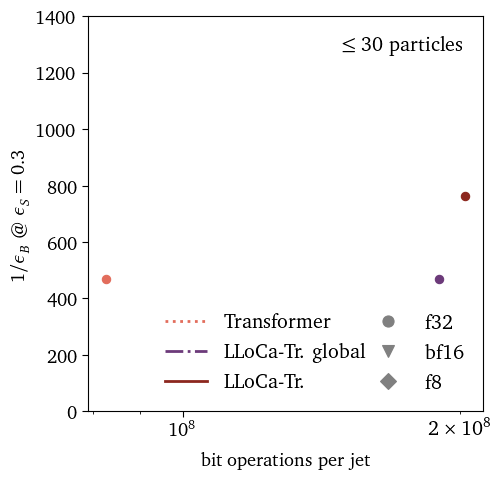

In [39]:
colors = [c_Tr, c_LLoCaglobal, c_LLoCa]
labels = ["Transformer", "LLoCa-Tr. global", "LLoCa-Tr."]
linestyles = [":", "-.", "-"]

keys = ["float32,float32", "float16,float16", "float8,float8"]
key_labels = {
    "float32,float32": "f32",
    "float16,float16": "bf16",
    "float8,float8": "f8",
    "float8,ternary": "f8 PARQ",
}
markers = {
    "float32,float32": "o",
    "float16,float16": "v",
    "float8,float8": "D",
    "float8,ternary": "*",
}

ymin = 0
ymax = 1400

fig,ax=plt.subplots(figsize=(5,5))
ax.set_xscale("log")
for label, color, linestyle in zip(labels, colors, linestyles):
    data = metrics[label]
    data = {k: data[k] for k in keys}
    bo = np.array([bitops[model_map_inv[label]][k] for k in keys])
    mean = np.array([metrics[label][k]["mean"] for k in keys])
    std = np.array([metrics[label][k]["std"] for k in keys])
    ms = [markers[k] for k in keys]
        
    mask = np.array([x is not None for x in mean])
    bo = bo[mask]
    mean = mean[mask]
    std = std[mask]
    ms = [m for i, m in enumerate(ms) if mask[i]]

    for e, m, s, mar in zip(bo, mean, std, ms):
        if m is None or s is None:
            continue
        ax.plot(e, m, color=color, marker=mar, markersize=6)
    ax.plot(bo, mean, color=color, linestyle=linestyle)
    ax.fill_between(bo, mean+std, mean-std, 
                    edgecolor=color, color=color, alpha=0.1, lw=0.01)

ax.set_ylabel(r"$1/\epsilon_B\ @\ \epsilon_S=0.3$", fontsize=FONTSIZE)
ax.set_xlabel("bit operations per jet", fontsize=FONTSIZE)

handles1 = [Line2D([0,1], [0,0], color=c, lw=2, linestyle=ls) for c, ls in zip(colors, linestyles)]
labels1 = labels
leg1 = ax.legend(
    handles1, labels1, loc="lower right", bbox_to_anchor=(0.75,0),
    frameon=False,
)
ms = [markers[k] for k in keys]
handles2 = [
    Line2D(
        [0],[0], linestyle="None", marker=m,
        markersize=8, markerfacecolor="0.5", 
        markeredgecolor="0.5"
    ) for m in ms
]
labels2 = [key_labels[k] for k in keys]
leg2 = ax.legend(
    handles2, labels2, loc="lower right", bbox_to_anchor=(1,0),
    frameon=False,
)
ax.add_artist(leg1)

ax.text(.95, .95, s=r"$\le 30$ particles", horizontalalignment="right", verticalalignment="top",
        transform=ax.transAxes)
ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
ax.xaxis.set_label_coords(0.5, X_LABEL_POS)
ax.yaxis.set_label_coords(Y_LABEL_POS, 0.5)
ax.set_ylim(ymin, ymax)
plt.subplots_adjust(LEFT, BOTTOM, RIGHT, TOP)
fig.savefig(file2, format="pdf")
plt.show()

In [40]:
file2.close()